In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score





In [ ]:
# 1. Veri Setini Yükleme ve İnceleme
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Veri türlerini görüntüleme
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
# Sütunları kaldırma
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)





KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:




# Sütun adlarını kontrol etme
print("Sütun adları:", df.columns)


Sütun adları: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:




# Sütun adlarını kontrol etme
print("Sütun adları:", df.columns)


Sütun adları: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
 #Drop() yöntemini kullanarak eksen 1'den "id" ve "Unnamed: 0" sütunlarını bırakın, ardından verilerin istatistiksel bir özetini elde etmek
 #için describe() yöntemini kullanın. Inplace parametresinin True
 #olarak ayarlandığından emin olun.

# 'id' sütununu kaldırma çünkü unnamed sütünü bulunmuyor veride
df.drop(['id'], axis=1, inplace=True, errors='ignore')

# İstatistiksel özet
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [ ]:
#Benzersiz kat değerlerine sahip evlerin sayısını saymak için value_counts yöntemini kullanın ve bunu bir veri çerçevesine dönüştürmek
 #için to_frame() yöntemini kullanın.

# Benzersiz 'condition' değerlerinin sayısını hesaplama
condition_counts = df['condition'].value_counts()








In [ ]:
df['condition'].value_counts()


,count
condition,
3,14031
4,5679
5,1701
2,172
1,30


In [ ]:
# Sonuçları veri çerçevesine dönüştürme
condition_counts_df = condition_counts.to_frame()

In [ ]:
# Sütun adlarını ayarlama (isteğe bağlı)
condition_counts_df.columns = ['Count']

In [ ]:
# Veri çerçevesini yazdırma
print(condition_counts_df)

           Count
condition       
3          14031
4           5679
5           1701
2            172
1             30


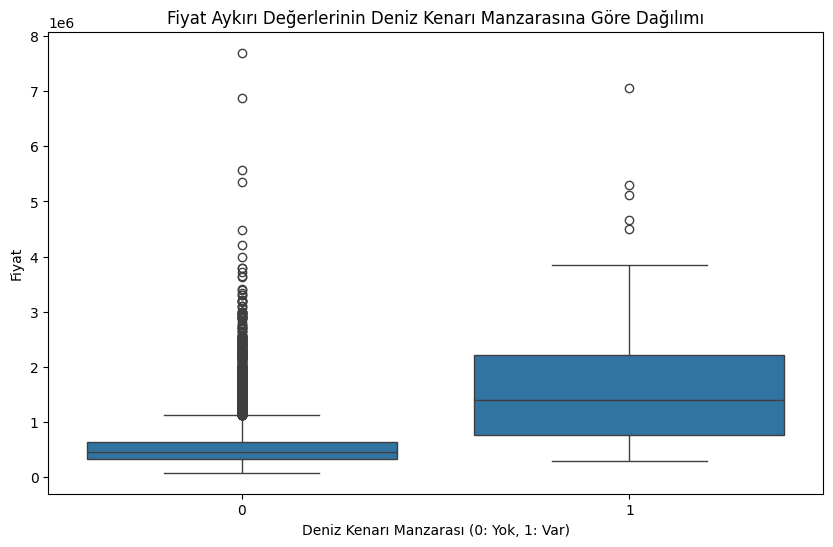

In [ ]:
#Seaborn kütüphanesindeki boxplot fonksiyonunu kullanarak deniz kenarı manzaralı evlerin mi yoksa deniz
#kenarı manzarası olmayan evlerin mi daha fazla fiyat aykırı değerine sahip olduğunu
#belirlemeye yardımcı olabilecek bir grafik oluşturun.



# Boxplot oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Fiyat Aykırı Değerlerinin Deniz Kenarı Manzarasına Göre Dağılımı')
plt.xlabel('Deniz Kenarı Manzarası (0: Yok, 1: Var)')
plt.ylabel('Fiyat')

# Grafiği gösterme
plt.show()


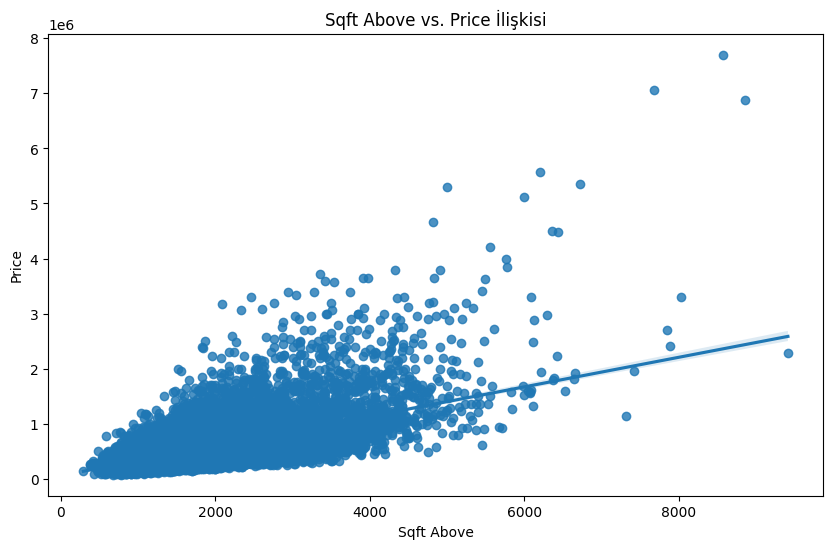

In [ ]:
#Sqft_above özelliğinin fiyat ile negatif mi yoksa pozitif mi ilişkili
#olduğunu belirlemek için seaborn kütüphanesindeki regplot fonksiyonunu kullanın.


# Regplot oluşturma
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Sqft Above vs. Price İlişkisi')
plt.xlabel('Sqft Above')
plt.ylabel('Price')

# Grafiği gösterme
plt.show()


In [ ]:
#'sqft_living' özelliğini kullanarak fiyatı tahmin etmek için doğrusal bir
#regresyon modeli kurun ve ardından R^2 değerini hesaplayın. Kodunuzun ve R^2 değerinin ekran görüntüsünü alın.



# Özellikler ve hedef değişkeni belirleme
X = df[['sqft_living']]  # Özellikler (bağımsız değişken)
y = df['price']  # Hedef değişken (bağımlı değişken)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# R² değerini hesaplama
r2 = r2_score(y_test, y_pred)

print(f'R² değeri: {r2:.4f}')


R² değeri: 0.4941


In [ ]:
#Özellik listesini kullanarak 'fiyatı' tahmin etmek için doğrusal bir regresyon modeli kurun:

#"katlar"
#"su kenarı"
#"lat"
#"yatak odaları"
#"sqft_basement"
#"görünüm"
#"banyolar"
#"sqft_living15"
#"sqft_above"
#"not"
#"sqft_living"

#Kodunuzun ve R^2 değeri ile yapın

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


# Özellikler ve hedef değişken
features = [
    'floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
    'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'condition',
    'sqft_living'
]

# Özellikler ve hedef değişkeni belirleme
X = df[features]
y = df['price']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# R² değerini hesaplama
r2 = r2_score(y_test, y_pred)
print(f'R² değeri: {r2:.4f}')


R² değeri: 0.6466


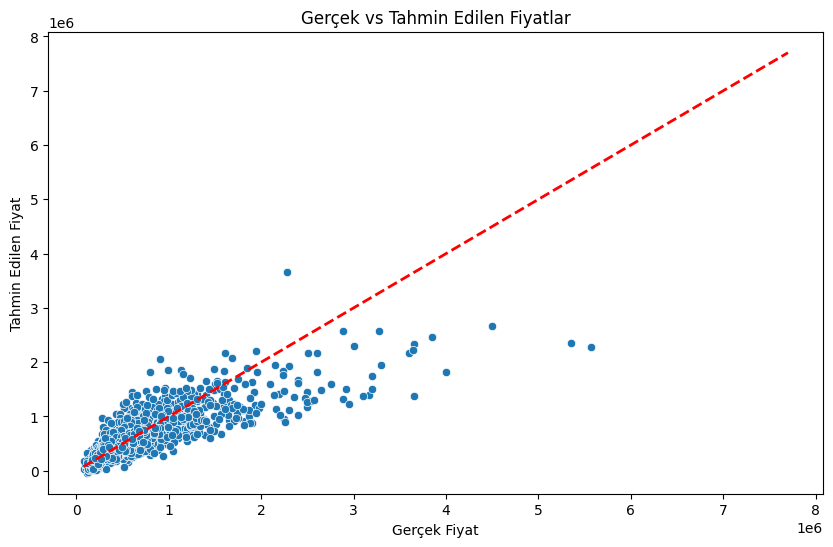

In [ ]:
# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs Tahmin Edilen Fiyatlar')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()


In [ ]:
#Verileri ölçeklendiren, polinom dönüşümü gerçekleştiren ve doğrusal bir regresyon modeline uyan bir boru hattı nesnesi oluşturun.
# Yukarıdaki soruda yer alan özellikleri kullanarak nesneyi uydurun, ardından modeli uydurun ve R^2 değerini hesaplayın.
 # Veri çerçevesini yükleme

from sklearn.pipeline import Pipeline



# Boru hattını oluşturma
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Verileri ölçeklendir
    ('poly', PolynomialFeatures(degree=2)),   # Polinom dönüşümü (2. derece)
    ('model', LinearRegression())              # Doğrusal regresyon modeli
])

# Modeli eğitme
pipeline.fit(X_train, y_train)

# Tahminler yapma
y_pred = pipeline.predict(X_test)

# R² değerini hesaplama
r2 = r2_score(y_test, y_pred)
print(f'R² değeri: {r2:.4f}')





R² değeri: 0.6713


In [ ]:
#Eğitim verilerini kullanarak bir Ridge regresyon nesnesi oluşturun, düzenlileştirme parametresini 0,1 olarak ayarlayın ve test verilerini
 #kullanarak R^2'yi hesaplayın.

from sklearn.linear_model import Ridge




# Ridge regresyon modeli ve boru hattı oluşturma
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Verileri ölçeklendir
    ('ridge', Ridge(alpha=0.1))             # Ridge regresyon modeli
])

# Modeli eğitme
pipeline.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = pipeline.predict(X_test)

# R² değerini hesaplama
r2 = r2_score(y_test, y_pred)
print(f'R² değeri: {r2:.4f}')


R² değeri: 0.6466


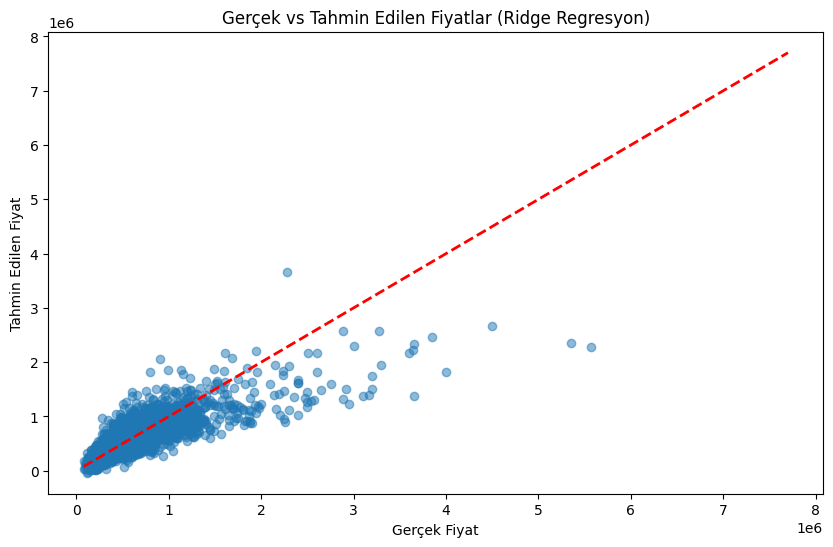

In [ ]:
# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs Tahmin Edilen Fiyatlar (Ridge Regresyon)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()


In [ ]:
#Hem eğitim verileri hem de test verileri üzerinde ikinci dereceden bir polinom dönüşümü gerçekleştirin.
# Düzenli hale getirme parametresini 0,1 olarak ayarlayarak eğitim verilerini kullanarak bir Ridge regresyon nesnesi oluşturun ve uydurun.
#Sağlanan test verilerini kullanarak R^2 değerini hesaplayın.


# Özellikler ve hedef değişken
X = df[['sqft_living']]  # Özellikler (gerekirse özelleştirin)
y = df['price']  # Hedef değişken

# Eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polinom dönüşümünü gerçekleştir
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regresyon modelini oluştur ve eğit
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Tahminlerde bulun ve R^2 değerini hesapla
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Değeri: {r2:.4f}")




R^2 Değeri: 0.5146


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.9207e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
